In [1]:
%info

# Analysis of Yelp Business Intelligence Data
We will analyze a subset of Yelp's business, reviews and user data. This dataset comes to us from Kaggle although we have taken steps to pull this data into a publis s3 bucket: s3://sta9760-yelpdataset/yelp-light/*business.json

# Part I: Installation and Initial Set
Begin by installing the necessary libraries that you may need to conduct your analysis. At the very least, you must install pandas and matplotlib

In [2]:
sc.list_packages()

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1606177671994_0001,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version  
-------------------------- ---------
beautifulsoup4             4.9.1    
boto                       2.49.0   
click                      7.1.2    
jmespath                   0.10.0   
joblib                     0.16.0   
lxml                       4.5.2    
mysqlclient                1.4.2    
nltk                       3.5      
nose                       1.3.4    
numpy                      1.16.5   
pip                        9.0.1    
py-dateutil                2.2      
python37-sagemaker-pyspark 1.4.0    
pytz                       2020.1   
PyYAML                     5.3.1    
regex                      2020.7.14
setuptools                 28.8.0   
six                        1.13.0   
soupsieve                  1.9.5    
tqdm                       4.48.2   
wheel                      0.29.0   
windmill                   1.6

In [3]:
sc.install_pypi_package("pandas==1.1.4")
sc.install_pypi_package("matplotlib==3.3.3")
sc.install_pypi_package("seaborn==0.11.0")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Importing
Now, import the installed packages from the previous block below.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Loading Data
We are finally ready to load data. Using spark load the data from S3 into a dataframe object that we can manipulate further down in our analysis.

In [5]:
business_data = spark.read.json('s3://stat9760fifi/yelp_academic_dataset_business.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Overview of Data
Display the number of rows and columns in our dataset.

In [6]:
print("'Columns:"+' '+str(len(business_data.columns))+' '+'|'+ \
      ' '+'Rows:'+' '+str(business_data.count())+ "'")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

'Columns: 14 | Rows: 209393'

Display the DataFrame schema below.

In [7]:
business_data.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

Display the first 5 rows with the following columns:

business_id

name

city

state

categories

In [8]:
business_data.select('business_id','name','city','state','categories').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+---------------+-----+--------------------+
|         business_id|                name|           city|state|          categories|
+--------------------+--------------------+---------------+-----+--------------------+
|f9NumwFMBDn751xgF...|The Range At Lake...|      Cornelius|   NC|Active Life, Gun/...|
|Yzvjg0SayhoZgCljU...|   Carlos Santo, NMD|     Scottsdale|   AZ|Health & Medical,...|
|XNoUzKckATkOD1hP6...|             Felinus|       Montreal|   QC|Pets, Pet Service...|
|6OAZjbxqM5ol29BuH...|Nevada House of Hose|North Las Vegas|   NV|Hardware Stores, ...|
|51M2Kk903DFYI6gnB...|USE MY GUY SERVIC...|           Mesa|   AZ|Home Services, Pl...|
+--------------------+--------------------+---------------+-----+--------------------+
only showing top 5 rows

# Part II: Analyzing Categories
Let's now answer this question: how many unique categories are represented in this dataset?

Essentially, we have the categories per business as a list - this is useful to quickly see what each business might be represented as but it is difficult to easily answer questions such as:

How many businesses are categorized as Active Life, for instance
What are the top 20 most popular categories available?
# Association Table
We need to "break out" these categories from the business ids? One common approach to take is to build an association table mapping a single business id multiple times to each distinct category.

What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid us in answering the questions asked above.
Implement the code necessary to derive the table described from your original yelp dataframe.

In [9]:
from pyspark.sql.functions import split, explode
business_association = business_data.withColumn('category',explode(split('categories',', ')))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Display the first 5 rows of your association table below.

In [10]:
business_association.select('business_id','category').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------------+
|         business_id|        category|
+--------------------+----------------+
|f9NumwFMBDn751xgF...|     Active Life|
|f9NumwFMBDn751xgF...|Gun/Rifle Ranges|
|f9NumwFMBDn751xgF...|     Guns & Ammo|
|f9NumwFMBDn751xgF...|        Shopping|
|Yzvjg0SayhoZgCljU...|Health & Medical|
+--------------------+----------------+
only showing top 5 rows

# Total Unique Categories
Finally, we are ready to answer the question: what is the total number of unique categories available?

Below, implement the code necessary to calculate this figure.

In [11]:
business_association.select("category").distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1336

# Top Categories By Business
Now let's find the top categories in this dataset by rolling up categories.

# Counts of Businesses / Category
So now, let's unroll our distinct count a bit and display the per count value of businesses per category.

In [12]:
business_association.groupby("category").count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|            category|count|
+--------------------+-----+
|      Paddleboarding|   36|
|      Dermatologists|  341|
|        Aerial Tours|   28|
|         Hobby Shops|  828|
|          Bubble Tea|  720|
|             Embassy|   13|
|             Tanning|  938|
|            Handyman|  682|
|      Aerial Fitness|   29|
|             Falafel|  159|
|       Outlet Stores|  399|
|        Summer Camps|  318|
|     Clothing Rental|   55|
|      Sporting Goods| 2311|
|     Cooking Schools|  118|
|  College Counseling|   15|
|  Lactation Services|   50|
|Ski & Snowboard S...|   50|
|             Museums|  359|
|              Doulas|   45|
+--------------------+-----+
only showing top 20 rows

# Bar Chart of Top Categories
With this data available, let us now build a barchart of the top 20 categories.

HINT: don't forget about the matplotlib magic!

%matplot plt

In [13]:
count_of_category=business_association.groupby("category").count().orderBy('count',ascending=False).limit(20)
pdf = count_of_category.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

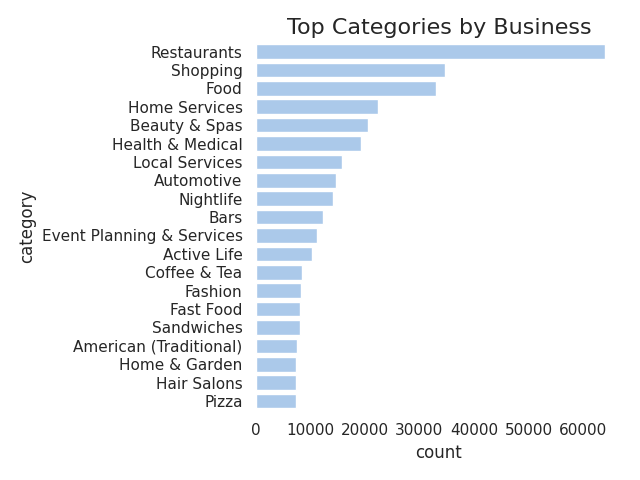

In [14]:
sns.set(style='white',palette="pastel", color_codes=True)
sns.barplot(data=pdf,x='count',y='category',color="b")
plt.title('Top Categories by Business',fontsize=16)
plt.tight_layout()
sns.despine(left=True, bottom=True)
%matplot plt

# Part III: Do Yelp Reviews Skew Negative?
Oftentimes, it is said that the only people who write a written review are those who are extremely dissatisfied or extremely satisfied with the service received.

How true is this really? Let's try and answer this question.

# Loading Review Data
Begin by loading the review data set from S3 and printing schema to determine what data is available.

In [15]:
review_data = spark.read.json('s3://stat9760fifi/yelp_academic_dataset_review.json' )
review_data.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

review_data = spark.read.json('s3://stat9760fifi/yelp_academic_dataset_review.json' )
review_data.printSchema()

Let's begin by listing the business_id and stars columns together for the user reviews data.

In [16]:
review_data.select('business_id','stars').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|-MhfebM0QIsKt87iD...|  2.0|
|lbrU8StCq3yDfr-QM...|  1.0|
|HQl28KMwrEKHqhFrr...|  5.0|
|5JxlZaqCnk1MnbgRi...|  1.0|
|IS4cv902ykd8wj1TR...|  4.0|
+--------------------+-----+
only showing top 5 rows

Check for null value before aggreation 

In [17]:
from pyspark.sql import functions as F
review_data.where(F.isnull(F.col("text"))).count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0

Now, let's aggregate along the stars column to get a resultant dataframe that displays average stars per business as accumulated by users who took the time to submit a written review.

In [18]:
review_agg=review_data.groupBy("business_id").avg('stars')
review_agg.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|        avg(stars)|
+--------------------+------------------+
|RMjCnixEY5i12Ciqn...|3.5316455696202533|
|VHsNB3pdGVcRgs6C3...| 3.411764705882353|
|kpbhERZoj1eTDRnMV...| 2.033333333333333|
|ipFreSFhjClfNETuM...|               2.6|
|9A_mB7Ez3RIh26EN5...|               2.6|
+--------------------+------------------+
only showing top 5 rows

Now the fun part - let's join our two dataframes (reviews and business data) by business_id.

In [19]:
joint_data = review_agg.join(business_data, review_agg.business_id == business_data.business_id)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Let's see a few of these:

In [20]:
order_joint=joint_data.select('avg(stars)','stars','name','city','state').orderBy('avg(stars)' \
                                                                    ,ascending = False)
order_joint.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-----+--------------------+---------+-----+
|avg(stars)|stars|                name|     city|state|
+----------+-----+--------------------+---------+-----+
|       5.0|  5.0|     Shaunz Clothing|Las Vegas|   NV|
|       5.0|  5.0|           Printloft|  Markham|   ON|
|       5.0|  5.0|     Handyman Pro LV|Las Vegas|   NV|
|       5.0|  5.0|Bergeron Engineering|     Mesa|   AZ|
|       5.0|  5.0|Plesh Family Chir...|  Madison|   WI|
+----------+-----+--------------------+---------+-----+
only showing top 5 rows

Compute a new dataframe that calculates what we will call the skew (for lack of a better word) between the avg stars accumulated from written reviews and the actual star rating of a business (ie: the average of stars given by reviewers who wrote an actual review and reviewers who just provided a star rating).

The formula you can use is something like:

(row['avg(stars)'] - row['stars']) / row['stars']

If the skew is negative, we can interpret that to be: reviewers who left a written response were more dissatisfied than normal. If skew is positive, we can interpret that to be: reviewers who left a written response were more satisfied than normal.

In [21]:
joint_skew = order_joint.withColumn('skew', (order_joint['avg(stars)'] - \
                                            order_joint['stars'])/order_joint['stars'])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

And finally, graph it!

In [22]:
pdf_skew = joint_skew.select('skew').toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

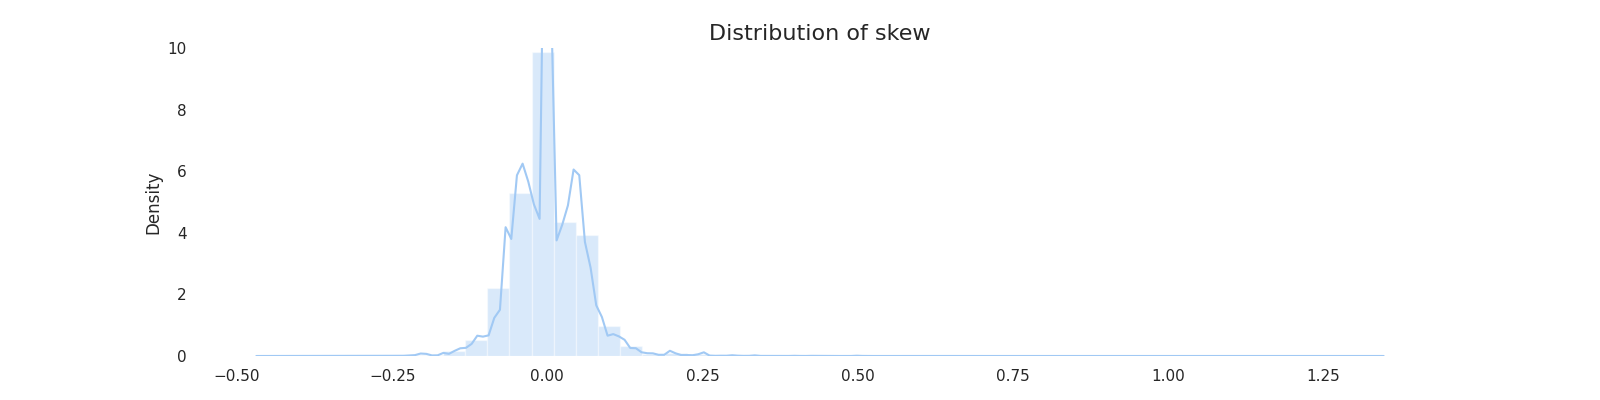

In [23]:
sns.set(style='white', palette="pastel",color_codes=True)
figure, ax = plt.subplots(figsize = (16,4))
sns.distplot(pdf_skew, color = 'b', kde= True)
plt.title('Distribution of skew',fontsize=16)
plt.ylim([0,10])                      
sns.despine(left=True, bottom=True)
%matplot plt

# Further analysis 

# So, do Yelp (written) Reviews skew negative? Does this analysis actually prove anything? Expound on implications / interpretations of this graph.


From the summary, the means of stars for written review and actual business ratings are very close. However, Since the skewness of the ditribution plot is more than 1, the Yelp written reviews actually skew positive. It means that reviewers who left a written response were more satisfied than normal. High kurtosis indicates outliers when average wrritten review for a business is much higher than actual business rating. However, we need more than descriptive statstics to prove. We need to do hypothesis testing. 


In [24]:
joint_skew.select('stars', 'avg(stars)','skew').describe().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+------------------+--------------------+
|summary|             stars|        avg(stars)|                skew|
+-------+------------------+------------------+--------------------+
|  count|            209393|            209393|              209393|
|   mean|3.5380552358483808|3.5343042366202604|0.001235344665268...|
| stddev| 1.023543034622585|  1.01520884751682| 0.05523522538149906|
|    min|               1.0|               1.0|-0.45454545454545453|
|    max|               5.0|               5.0|  1.3333333333333335|
+-------+------------------+------------------+--------------------+

Find the skewness and kurtosis

In [25]:
print("Skewness: %f" % pdf_skew.skew())
print("Kurtosis: %f" % pdf_skew.kurt())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Skewness: 1.336517
Kurtosis: 16.880116

# Part IV: Should the Elite be Trusted? (Or, some other analysis of your choice)
For the final portion - you have a choice:

Try and analyze some interesting dimension to this data. The ONLY requirement is that you must use the Users dataset and join on either the business* or reviews** dataset

Or, you may try and answer the question posed: how accurate or close are the ratings of an "elite" user (check Users table schema) vs the actual business rating.

Feel free to use any and all methodologies at your disposal - only requirement is you must render one visualization in your analysis

Begin by loading the user data set from S3 and printing schema to determine what data is available.

In [26]:
user_data = spark.read.json('s3://stat9760fifi/yelp_academic_dataset_user.json')
user_data.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

Check the distribution of elite colum and order by count

In [27]:
user_data.groupby('elite').count().orderBy('count',ascending=False).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------+
|               elite|  count|
+--------------------+-------+
|                    |1892742|
|                2018|  11611|
|           2017,2018|  10196|
|      2016,2017,2018|   6369|
| 2015,2016,2017,2018|   4762|
|           2016,2017|   2273|
|2014,2015,2016,20...|   2236|
|2012,2013,2014,20...|   1902|
|           2015,2016|   1871|
|      2015,2016,2017|   1618|
|2013,2014,2015,20...|   1552|
|                2017|   1380|
|                2012|   1101|
|2011,2012,2013,20...|   1021|
|           2012,2013|    950|
|      2012,2013,2014|    932|
|           2014,2015|    894|
|           2011,2012|    894|
|2010,2011,2012,20...|    877|
|           2010,2011|    836|
+--------------------+-------+
only showing top 20 rows

Move the rows where elite is empty and show the distribution again

In [28]:
user_data_filter=user_data.filter(user_data.elite != "")
user_data_filter.groupby('elite').count().orderBy('count',ascending=False).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|               elite|count|
+--------------------+-----+
|                2018|11611|
|           2017,2018|10196|
|      2016,2017,2018| 6369|
| 2015,2016,2017,2018| 4762|
|           2016,2017| 2273|
|2014,2015,2016,20...| 2236|
|2012,2013,2014,20...| 1902|
|           2015,2016| 1871|
|      2015,2016,2017| 1618|
|2013,2014,2015,20...| 1552|
|                2017| 1380|
|                2012| 1101|
|2011,2012,2013,20...| 1021|
|           2012,2013|  950|
|      2012,2013,2014|  932|
|           2014,2015|  894|
|           2011,2012|  894|
|2010,2011,2012,20...|  877|
|           2010,2011|  836|
|                2016|  835|
+--------------------+-----+
only showing top 20 rows

Build an association table mapping a single user id multiple times to each distinct elite year

In [29]:
user_data_select=user_data_filter.select('user_id','elite')
user_data_expand = user_data_select.withColumn('elite_year',explode(split('elite',',')))
user_data_simple= user_data_expand.select('user_id','elite_year')
user_data_simple.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------+
|             user_id|elite_year|
+--------------------+----------+
|FOBRPlBHa3WPHFB5q...|      2008|
|FOBRPlBHa3WPHFB5q...|      2009|
|FOBRPlBHa3WPHFB5q...|      2010|
|FOBRPlBHa3WPHFB5q...|      2011|
|FOBRPlBHa3WPHFB5q...|      2012|
+--------------------+----------+
only showing top 5 rows

Transform date column to join the table later

In [30]:
from pyspark.sql.functions import substring
review_data_transform= review_data.withColumn('elite_year', substring('date',1,4))
review_data_select=review_data_transform.select('user_id','business_id','stars','elite_year')
review_data_select.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-----+----------+
|             user_id|         business_id|stars|elite_year|
+--------------------+--------------------+-----+----------+
|OwjRMXRC0KyPrIlcj...|-MhfebM0QIsKt87iD...|  2.0|      2015|
|nIJD_7ZXHq-FX8byP...|lbrU8StCq3yDfr-QM...|  1.0|      2013|
|V34qejxNsCbcgD8C0...|HQl28KMwrEKHqhFrr...|  5.0|      2015|
|ofKDkJKXSKZXu5xJN...|5JxlZaqCnk1MnbgRi...|  1.0|      2011|
|UgMW8bLE0QMJDCkQ1...|IS4cv902ykd8wj1TR...|  4.0|      2017|
+--------------------+--------------------+-----+----------+
only showing top 5 rows

Join two tables by user_id and year. The resultant table only contains review stars made by elite. Reviews made in the years when users are not elite are excluded.

In [31]:
review_user_joint=review_data_select.join(user_data_simple, on =['user_id','elite_year']) 
review_user_joint.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------+--------------------+-----+
|             user_id|elite_year|         business_id|stars|
+--------------------+----------+--------------------+-----+
|--_H9j6ggxvqhh9nP...|      2015|NTQXBbCa5Ugj5lNr6...|  4.0|
|--_H9j6ggxvqhh9nP...|      2015|AV6weBrZFFBfRGCbc...|  3.0|
|--_H9j6ggxvqhh9nP...|      2015|_HxXA4jQXQzt_XxHW...|  5.0|
|--_H9j6ggxvqhh9nP...|      2015|XqJ33USvU6646zDGz...|  3.0|
|--_H9j6ggxvqhh9nP...|      2015|BKZKXKbfBUQ8sk0I0...|  4.0|
+--------------------+----------+--------------------+-----+
only showing top 5 rows

Calculate the average of elite rating by business_id

In [32]:
review_user_star=review_user_joint.groupBy('business_id').avg('stars')
review_user_star.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|        avg(stars)|
+--------------------+------------------+
|--9e1ONYQuAa-CB_R...| 4.240641711229946|
|RtUvSWO_UZ8V3Wpj0...| 4.188811188811189|
|cz5vz-893D3LNH3TM...|3.8805970149253732|
|eKznX8VTfcQrjCqXp...| 4.279411764705882|
|SjgeuBlgKER9yegpo...| 3.857142857142857|
+--------------------+------------------+
only showing top 5 rows

In [33]:
review_user_business=review_user_star.join(business_association, \
                                    review_user_star.business_id==business_association.business_id)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Compare to actual business rating

In [34]:
joint_skew_elite = review_user_business.withColumn('skew_elite', (review_user_business['avg(stars)'] - \
                                     review_user_business['stars'])/review_user_business['stars'])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [35]:
pdf_elite = joint_skew_elite.select('skew_elite').toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

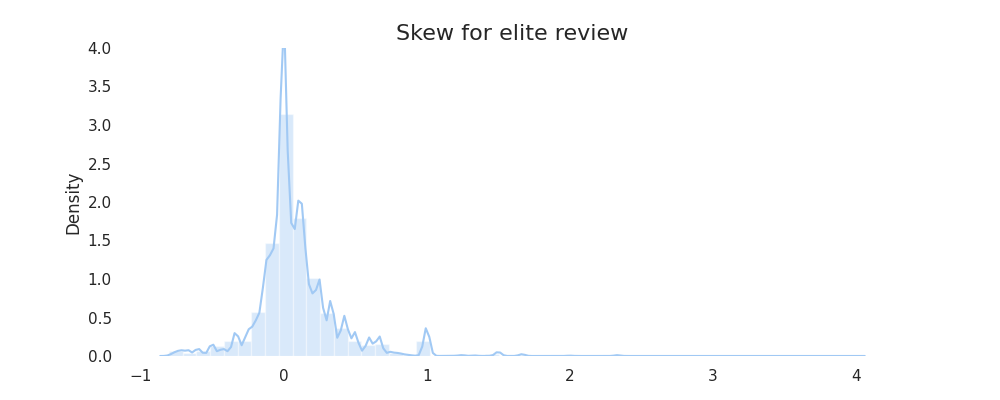

In [36]:
sns.set(style='white', palette="pastel",color_codes=True)
figure, ax = plt.subplots(figsize = (10,4))
sns.distplot(pdf_elite, color = 'b',kde= True)
plt.title('Skew for elite review',fontsize=16)
plt.ylim([0,4])
sns.despine(left=True, bottom=True)
%matplot plt

In [37]:
print("Skewness: %f" % pdf_elite.skew())
print("Kurtosis: %f" % pdf_elite.kurt())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Skewness: 1.553183
Kurtosis: 7.585581

# How accurate or close are the ratings of an "elite" user (check Users table schema) vs the actual business rating.

From the plot and skewness, an elite user tend to leave more postive reviews than usual. It is possible that elite users have access to more features. Elite users are also more motivated to write a good review. 